This project focuses on building a machine learning model to forecast the monthly U.S. unemployment rate using historical time-series data. The dataset was sourced from the Federal Reserve Economic Data (FRED), specifically the “UNRATE” series, which provides the U.S. civilian unemployment rate from 1948 to the present.

The goal was to predict future unemployment rates based solely on past values, making it a univariate time-series regression problem. Initial exploration involved visualizing long-term trends and understanding seasonality. Feature engineering played a critical role: we created lag features (unrate_lag1 to unrate_lag4) to represent prior months’ unemployment rates, rolling statistics (3- and 6-month averages) to capture local trends, and time-based features like month, quarter, and year to model seasonality and long-term changes.

Three regression models were trained and evaluated: Linear Regression, Random Forest, and XGBoost. While the linear model performed strongly (R² ≈ 0.98), tree-based models showed even better results:

Random Forest: R² = 0.993, RMSE = 0.139

XGBoost: R² = 0.994, RMSE = 0.123

These results demonstrate that combining time-aware features with powerful ensemble models can yield highly accurate forecasts. However, the scope of this project was intentionally narrow, relying on a single feature (unemployment rate) and its derived forms. While it was effective for learning and experimentation, it lacks the complexity and integration seen in production-level ML systems.

This project serves as a strong foundation for understanding time-series regression but is not intended as a portfolio-level deployment. The next step is to work on a multi-feature industrial dataset to implement full ML pipelines including data ingestion, feature scaling, hyperparameter tuning, and cloud deployment.

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('UNRATE.csv')
df.head()

,observation_date,UNRATE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5


In [6]:
df['observation_date'] = pd.to_datetime(df['observation_date'])

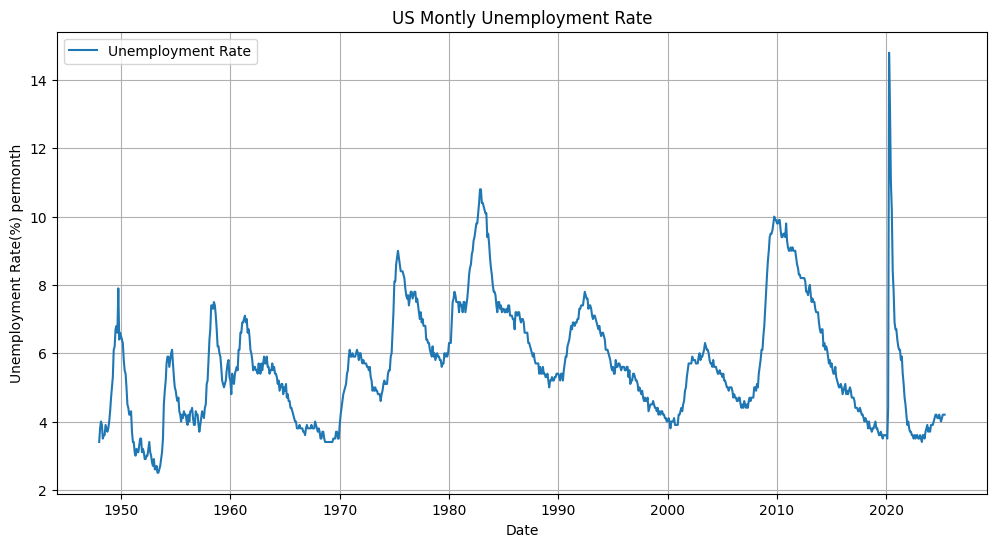

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df['observation_date'], df['UNRATE'], label = 'Unemployment Rate')
plt.title('US Montly Unemployment Rate')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate(%) permonth')
plt.grid(True)
plt.legend()
plt.show()

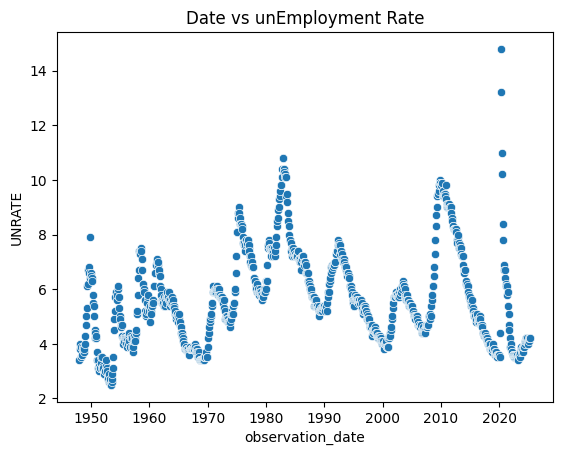

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x='observation_date', y='UNRATE', data = df)
plt.title('Date vs unEmployment Rate')
plt.show()


In [10]:
df['unrate_lag1'] = df['UNRATE'].shift(1)
df['unrate_lag2'] = df['UNRATE'].shift(2)
df.dropna(inplace=True)

In [11]:
df.isnull().any()

observation_date    False
UNRATE              False
unrate_lag1         False
unrate_lag2         False
dtype: bool

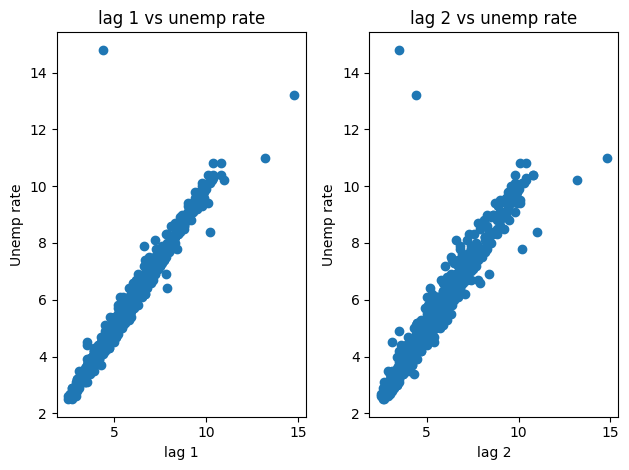

In [33]:
plt.subplot(1, 2, 1)
plt.scatter(df['unrate_lag1'], df['UNRATE'])
plt.xlabel('lag 1')
plt.ylabel('Unemp rate')
plt.title('lag 1 vs unemp rate')

plt.subplot(1, 2, 2)
plt.scatter(df['unrate_lag2'], df['UNRATE'])
plt.xlabel('lag 2')
plt.ylabel('Unemp rate')
plt.title('lag 2 vs unemp rate')

plt.tight_layout()
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
X = df[['unrate_lag1', 'unrate_lag2']]
y = df['UNRATE']

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size= 0.2, shuffle= False)

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [20]:
import numpy as np
rmse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(rmse)
mae = mean_absolute_error(y_test, y_pred)

print(f'RMSE: {rmse:.3f}, MAE: {mae:.3f}')

RMSE: 0.824, MAE: 0.216


In [27]:
print(X_test['unrate_lag1'].shape)
residuals = y_test-y_pred
print(residuals.shape)

(186,)
(186,)


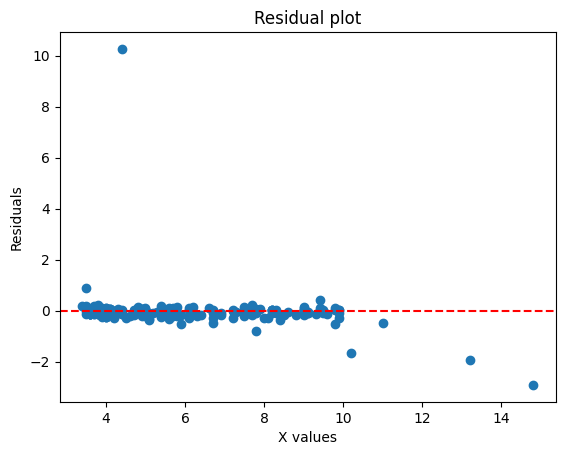

In [28]:

plt.scatter(X_test['unrate_lag1'], residuals)
plt.xlabel('X values')
plt.ylabel('Residuals')
plt.title('Residual plot')
plt.axhline(y = 0, color = 'r', linestyle='--')

In [35]:
type(df['observation_date'].iloc[-len(y_test):])

pandas.core.series.Series

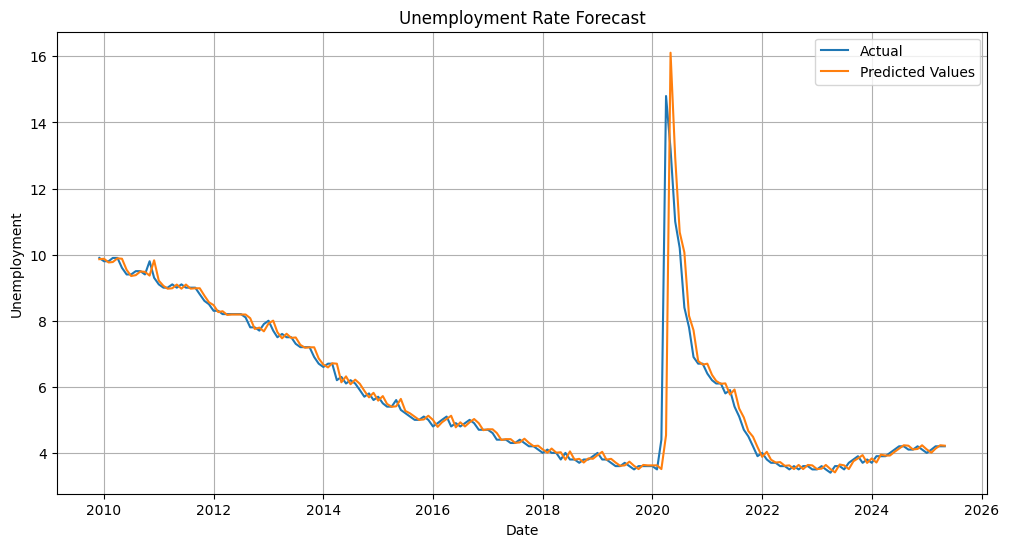

In [36]:
plt.figure(figsize=(12, 6))
plt.plot(df['observation_date'].iloc[-len(y_test):], y_test, label ='Actual')
plt.plot(df['observation_date'].iloc[-len(y_test):], y_pred, label = 'Predicted Values')
plt.title('Unemployment Rate Forecast')
plt.xlabel('Date')
plt.ylabel('Unemployment')
plt.legend()
plt.grid(True)


In [37]:
df['unrate_lag3'] = df['UNRATE'].shift(3)
df['unrate_lag4'] = df['UNRATE'].shift(4)
df.dropna(inplace = True)

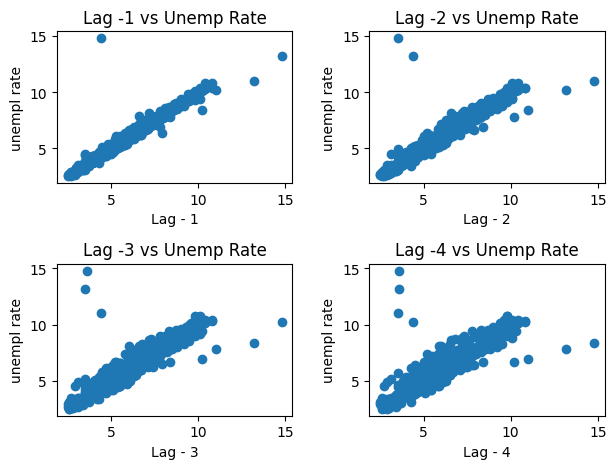

In [43]:
plt.subplot(2,2,1)
plt.scatter(df['unrate_lag1'], df['UNRATE'])
plt.xlabel('Lag - 1')
plt.ylabel('unempl rate')
plt.title('Lag -1 vs Unemp Rate')

plt.subplot(2,2,2)
plt.scatter(df['unrate_lag2'], df['UNRATE'])
plt.xlabel('Lag - 2')
plt.ylabel('unempl rate')
plt.title('Lag -2 vs Unemp Rate')

plt.subplot(2,2,3)
plt.scatter(df['unrate_lag3'], df['UNRATE'])
plt.xlabel('Lag - 3')
plt.ylabel('unempl rate')
plt.title('Lag -3 vs Unemp Rate')

plt.subplot(2,2,4)
plt.scatter(df['unrate_lag4'], df['UNRATE'])
plt.xlabel('Lag - 4')
plt.ylabel('unempl rate')
plt.title('Lag -4 vs Unemp Rate')

plt.tight_layout()
plt.show()

In [44]:
X = df[['unrate_lag1', 'unrate_lag2', 'unrate_lag3', 'unrate_lag4']]
y = df['UNRATE']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True)


In [48]:
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [50]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
print(f"RMSE: {rmse:.3f}, MAE: {mae:.3f}")

RMSE: 0.208, MAE: 0.154


In [ ]:
from sklearn.metrics import r2_score
r2_score_ = r2_score(y_test, y_pred)
print(f'R2 score: {r2_score:.3f}')

R2 score: 0.983


In [52]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_test)

In [55]:
from sklearn.metrics import r2_score
r2_score_rfr = r2_score(y_test, y_pred_rfr)
print(f'R2 Score: {r2_score_rfr:.3f}')
mse = mean_squared_error(y_test, y_pred_rfr)
rmse = np.sqrt(mse)
print(f'RMSE: {rmse:.3f}')

R2 Score: 0.979
RMSE: 0.229


In [56]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators =100, learning_rate = 0.1)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

In [57]:
from sklearn.metrics import r2_score
r2_score_xgb = r2_score(y_test, y_pred_xgb)
print(f'R2 Score: {r2_score_xgb:.3f}')
mse = mean_squared_error(y_test, y_pred_xgb)
rmse = np.sqrt(mse)
print(f'RMSE: {rmse:.3f}')

R2 Score: 0.977
RMSE: 0.240


In [62]:
for lag in range(5,13):
    df[f'unrate_lag{lag}'] = df['UNRATE'].shift(lag)
df.dropna(inplace=True)
print(df.shape)

(899, 14)


In [68]:
X=df.iloc[:,1:]
X = X.drop('UNRATE',axis=1)
y = df['UNRATE']
X.columns

Index(['unrate_lag1', 'unrate_lag2', 'unrate_lag3', 'unrate_lag4',
       'unrate_lag5', 'unrate_lag6', 'unrate_lag7', 'unrate_lag8',
       'unrate_lag9', 'unrate_lag10', 'unrate_lag11', 'unrate_lag12'],
      dtype='object')

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [71]:
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)


In [72]:
from sklearn.metrics import r2_score
r2_score_rfr = r2_score(y_test, y_pred)
print(f'R2 Score: {r2_score_rfr:.3f}')
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'RMSE: {rmse:.3f}')

R2 Score: 0.852
RMSE: 0.825


In [73]:
xgb = XGBRegressor(n_estimators = 100, learning_rate = 0.1)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

In [74]:
from sklearn.metrics import r2_score
r2_score_xgb = r2_score(y_test, y_pred_xgb)
print(f'R2 Score: {r2_score_xgb:.3f}')
mse = mean_squared_error(y_test, y_pred_xgb)
rmse = np.sqrt(mse)
print(f'RMSE: {rmse:.3f}')

R2 Score: 0.853
RMSE: 0.822


In [77]:
for i in range(5,13):
    df.drop(f'unrate_lag{i}', axis = 1, inplace = True)

In [78]:
df.columns

Index(['observation_date', 'UNRATE', 'unrate_lag1', 'unrate_lag2',
       'unrate_lag3', 'unrate_lag4'],
      dtype='object')

In [79]:
df['rolling_mean_3'] = df['UNRATE'].rolling(window=3).mean()
df['rolling_mean_4'] = df['UNRATE'].rolling(window=6).mean()
df['date'] = df['observation_date'].dt.month
df['quarter'] = df['observation_date'].dt.quarter
df['year'] = df['observation_date'].dt.year
df.drop('observation_date', axis = 1, inplace = True)

In [82]:
X = df.iloc[:,1:]
y = df['UNRATE']

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
rfr = RandomForestRegressor(n_estimators=100)
rfr.fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_test)


In [85]:
from sklearn.metrics import r2_score
r2_score_rfr = r2_score(y_test, y_pred_rfr)
print(f'R2 Score: {r2_score_rfr:.3f}')
mse = mean_squared_error(y_test, y_pred_rfr)
rmse = np.sqrt(mse)
print(f'RMSE: {rmse:.3f}')

R2 Score: 0.993
RMSE: 0.139


In [87]:
xgb = XGBRegressor(n_estimators=100, learning_rate = 0.1)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

In [88]:
from sklearn.metrics import r2_score
r2_score_xgb = r2_score(y_test, y_pred_xgb)
print(f'R2 Score: {r2_score_xgb:.3f}')
mse = mean_squared_error(y_test, y_pred_xgb)
rmse = np.sqrt(mse)
print(f'RMSE: {rmse:.3f}')

R2 Score: 0.994
RMSE: 0.123


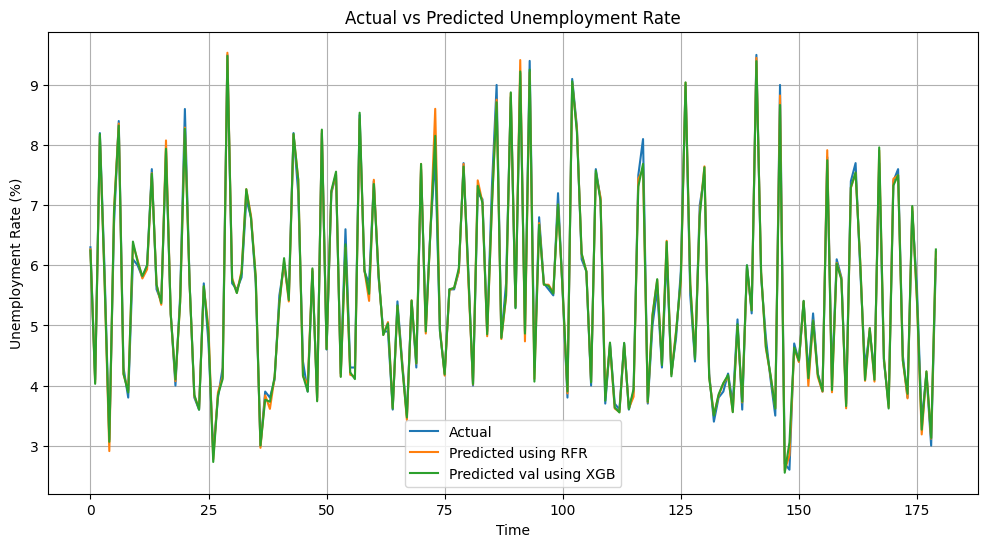

In [91]:
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label = 'Actual')
plt.plot(y_pred_rfr, label = 'Predicted using RFR')
plt.plot(y_pred_xgb, label= 'Predicted val using XGB')
plt.legend()
plt.title('Actual vs Predicted Unemployment Rate')
plt.xlabel('Time')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.show()

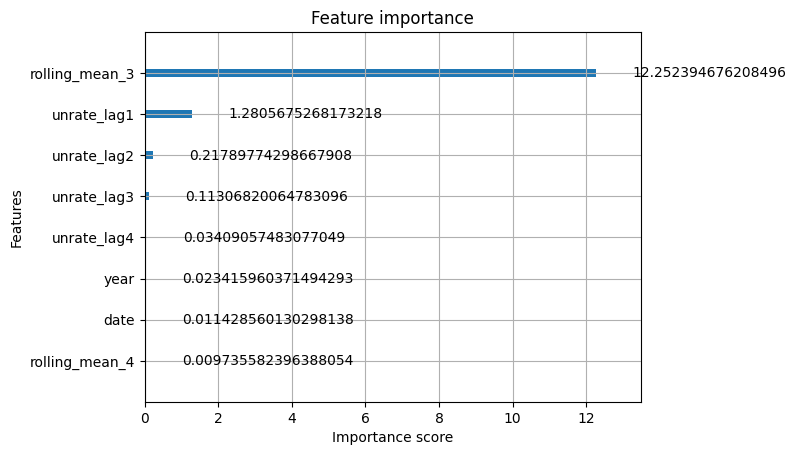

In [92]:
from xgboost import plot_importance

plot_importance(xgb, importance_type='gain', max_num_features=10)
plt.show()